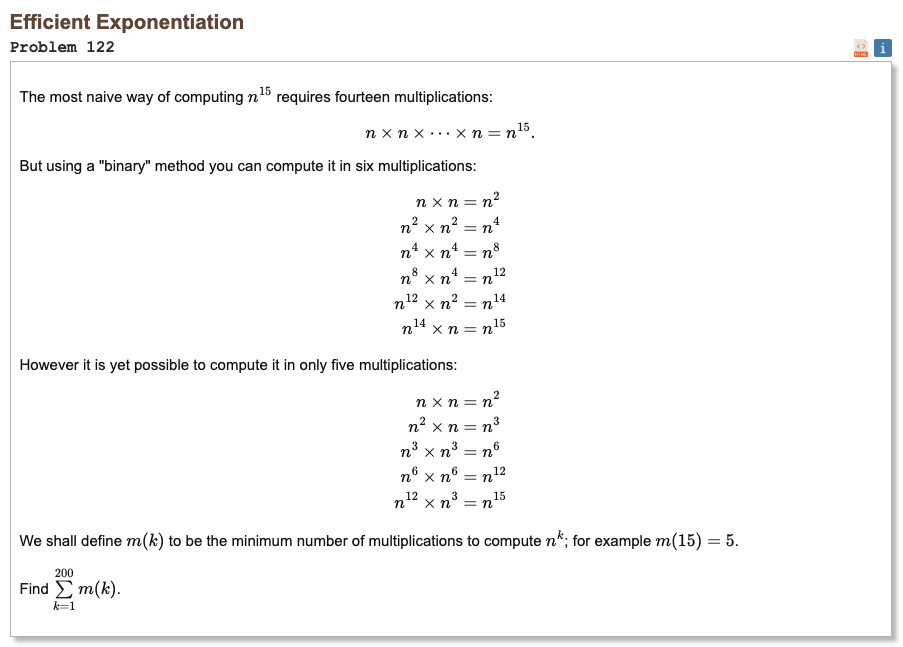

## Initial approach

* understand the multiplication count in the question

In [1]:
n = 2
print("Straightforward :", n**15)
print("15 times n", n*n*n*n*n*n*n*n*n*n*n*n*n*n*n)

Straightforward : 32768
15 times n 32768


* try loop here
* check last bit of exp (check odd or even)
* if odd -> multiply result by base
* square the base
* divide exp by 2 (remove last bit)
* repeat until exp = 0

In [2]:
base = 2
exp = 15
result = 1

while exp > 0:
    if exp % 2 == 1:
        result *= base
    base *= base
    exp //= 2

print(result)

32768


* build the number with an addition chain starting from 1
* search by depth limits (0,1,2,…) until n is reachable
* prune if even doubling L times cannot reach n
* try last + chain[i] in descending order to reach n faster
* Sum minimal lengths

In [3]:
from math import log2

def min_chain_length(n):
    chain = [1]
    def dfs(L):
        last = chain[-1]
        if last == n:
            return True
        if L == 0:
            return False
        if last << L < n:
            return False
        for i in range(len(chain) - 1, -1, -1):
            new_val = last + chain[i]
            if new_val <= last or new_val > n:
                continue
            chain.append(new_val)
            if dfs(L - 1):
                return True
            chain.pop()
        return False
    L = 0
    while True:
        if dfs(L):
            return L
        L += 1

total = 0
for k in range(2, 201):
    total += min_chain_length(k)

print(total)

1582
